# Erzeugen Synthetischer Bilddaten


In [1]:
#Import der Pakete
import os
import cv2
import PIL
from PIL import Image
import numpy as np
#import mxnet as mx: nützliches Paket, lässt sich leider nicht installieren (exotischer Fehler)
import skimage.io as io
import skimage.transform as transform
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from skimage import img_as_ubyte
%matplotlib inline
import random

In [2]:
#Read and show Image
import glob
#Einlesepfad
path1 = glob.glob("F:/Projektseminar/Bildsammlung_Umbenennung/*.jpg")         #"C:/Users/bened/Pictures/PJS_Bildspeicher/*.PNG"
#Einlesepfad Name
pathName='F:/Projektseminar/Bildsammlung_Umbenennung/'                     #'C:/Users/bened/Pictures/PJS_Bildspeicher/'
#img_number=1

#Speicherpfad
path= 'F:/Projektseminar/Umbenennungen/'            #'C:/Users/bened/Pictures/PJS_Bildspeicher/'    
#Speicherformat
format=".jpg" 

Automatisches Entfernen des *.jpg nicht möglich, da es eine Liste aus allen Dateipfaden aller Bilder und kein String ist

In [22]:
#Test der Umbenennung
import os
n=0
type(path)
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #Isolation der Bildbenennung
    name=os.listdir(pathName)[n]
    print(name)
    #Zerlegung der Bildbenennung
    vorne= name[0:8]
    hinten= name[9:37]
    mod= name[8] 
    mod=1
    mod=str(mod)
    res=vorne+mod+hinten
    print(res)
    n=n+1

EZB.jpg


IndexError: string index out of range

Infos: 
Nomenklatur der Bilder: "C:\Users\bened\OneDrive - Universität Würzburg\PJS - Intern\Neuronale Netze\Infos etc\Bennenung Dateinamen Bilder.xlsx"
Python String Operations: https://www.w3schools.com/python/python_ref_string.asp
https://www.programiz.com/python-programming/string

In [12]:
#Dekodierung der Bildbenennung
#unter Bedingung, dass Baustellen ID, Wand ID und BildID =einstellig: 
st_spi_ver=8 #Position des horizontalen Spiegelns
st_rot=10
P=12
P=14
P=16
P=18
P=20
P=22
P=24

In [8]:
print(len(name))

TypeError: 'int' object is not callable

Pathname=  1_1_1_10_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_1_9_1_7.7_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_1_11_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_1_9_1_7.7_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_1_12_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_1_9_1_7.7_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_1_13_1_1_1_1_1_1_1_1_1_2_1_1.jpg
länge des Namen=  <built-in function len>
res= 1_1_1_9_1_7.7_1_1_1_1_1_1_1_2_1_1.jpg
Pathname=  1_1_1_1_1_1_1_1_1_1_1_1_1_2_1_2.jpg
länge des Namen=  <built-in function len>
Vorne= 1_1_1_1_
Hinten= _1_1_1_1_1_1_1_1_2_1_2.jpg
mod= 1
res= 1_1_1_1_1_7.7_1_1_1_1_1_1_1_2_1_2.jpg
Pathname=  1_1_1_2_1_1_1_1_1_1_1_1_1_2_1_2.jpg
länge des Namen=  <built-in function len>
Vorne= 1_1_1_2_
Hinten= _1_1_1_1_1_1_1_1_2_1_2.jpg
mod= 2
res= 1_1_1_2_1_7.7_1_1_1_1_1_1_1_2_1_2.jpg
Pathname=  1_1_1_3_1_1_1_1_1_1_1_1_1_2_1_2.jpg
länge des Namen=  <built-in function len>

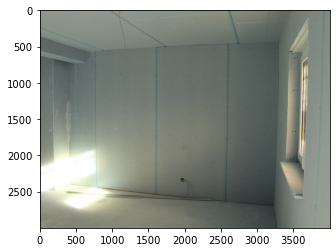

In [19]:
#Spieglen horizontal
img_number=1
n=0
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1) #Convert an image to unsigned byte format, with values in [0, 255].
    #cv2.imshow("Image",img)
    a=img
    a = cv2.flip(img, 1)
    #img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()
#Anzeigen des Bildes
    plt.imshow(a)
#Isolation der Bildbenennung
    name=os.listdir(pathName)[n]
    print("Pathname= ", name)
    length=len(name)
    print("länge des Namen= ", len)
#Zerlegung der Bildbenennung
    if length==35:
        vorne= name[0:(st_spi_ver)] #-1
        print("Vorne=", vorne)
        hinten= name[(st_spi_ver+1):length]
        print("Hinten=", hinten)
        mod= name[st_spi_ver-2]
        print("mod=", mod)
    #elif length==36:
        vorne= name[0:9]
        hinten= name[10:38]
        mod= name[9]
    #elif length==37:
        vorne= name[0:10]
        hinten= name[11:39]
        mod= name[10]

    mod=7.7
    mod=str(mod)
    res=vorne+mod+hinten
    print("res=", res)
    n=n+1
#Speichern
    cv2.imwrite(os.path.join(path+res), a)


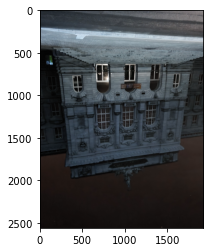

In [6]:
#Spieglen vertikal
img_number=1
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    #hier die Methode
    b=img
    b = cv2.flip(img, 0)
    plt.imshow(b)
    cv2.imwrite(os.path.join(path+"Mirr_Ver"+str(img_number)+".jpg"), b)
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Rotieren: 5*Zufällig

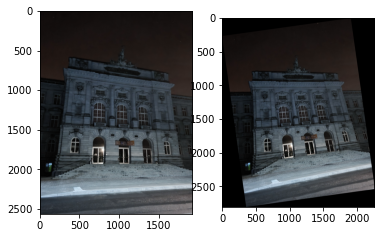

In [10]:
#Rotation
from scipy.ndimage import rotate
from scipy.misc import face
from matplotlib import pyplot as plt
import random

img_number=1
i=0
while i< 5:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        #cv2.imshow("Image",img)
        img1 = img
        angle=random.randint(-180,180)
        rot = rotate(img1, angle, reshape=True) #falls originale Bildgröße beibehalten werden soll: reshape=false
        #aber dann werden Bereiche des Bildes abgeschnitten
        cv2.imwrite(os.path.join(path+"RandomRotate_"+str(img_number)+".jpg"), rot)  #Speichername abändern!
        img_number +=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(rot)

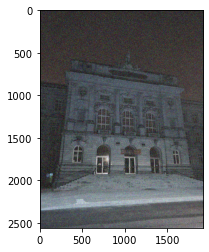

In [5]:
#Random Noise: Salt and Pepper
from skimage.util import random_noise

img_number=1
i=0
while i< 3:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        #cv2.imshow("Image",img)
        noise_img=random_noise(img, mode='s&p', amount=0.3)
        noise_img=np.array(255*noise_img, dtype= 'uint8')
        plt.imshow(noise_img)
        cv2.imwrite(os.path.join(path+"Noise_S&P1_"+str(img_number)+".jpg"), noise_img)  #Speichername abändern!
        img_number +=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

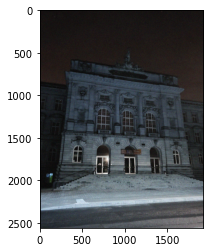

In [14]:
#!!!Random Noise: Gaussean Noise
from skimage.util import random_noise
img_number=1
i=0
while i< 3:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        #cv2.imshow("Image",img)
        random_noise1=random_noise(img, mode='gaussian', seed=None, clip=True) #Amount kann bei Gauss nicht geändert werden
        noise_img=np.array(255*random_noise1, dtype= 'uint8')
        plt.imshow(noise_img)
        cv2.imwrite(os.path.join(path+"Gauss_"+str(img_number)+".jpg"), noise_img)  #Speichername abändern!
        img_number +=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

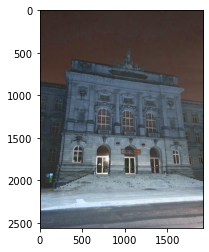

In [15]:
#Farbraumtransformation: Verändern der Helligkeit
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

img_number=1
i=0 #Startwert für Anzahl der Durchläufe
BR_CN=-60 #Startwert der Helligkeit
while i< 7:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        BR_CN_File=str(BR_CN) #Conversion von Int zu String for Filename
        img2 = change_brightness(img, value=BR_CN) #increases
        plt.imshow(img2)
        cv2.imwrite(os.path.join(path+"Brightness_"+BR_CN_File+"_"+str(img_number)+".jpg"), img2)  #Speichername abändern!
        img_number +=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    BR_CN=BR_CN+20 #Erhöhung der Helligkeit pro Durchlauf (i)
    i=i+1

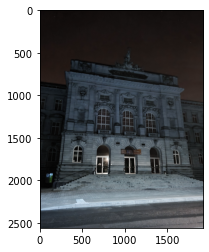

In [17]:
#Kernel Filter: 
#Schärfen mit 2 verschiedenen schärfe Kernel Filtern:
img_number=1
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharp_img = cv2.filter2D(img, -1, kernel)
    plt.imshow(sharp_img)
    cv2.imwrite(os.path.join(path+"Sharp1_"+str(img_number)+".jpg"), sharp_img)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    sharp_img = cv2.filter2D(img, -1, kernel)
    plt.imshow(sharp_img)
    cv2.imwrite(os.path.join(path+"Sharp2_"+str(img_number)+".jpg"), sharp_img)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#Blur mit 2 verschiedenen blur Kernel Filtern:
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[0.0625,0.125,0.0625], [0.125,0.25,0.125], [0.0625,0.125,0.0625]])
    blur_img = cv2.filter2D(img, -1, kernel)
    plt.imshow(sharp_img)
    cv2.imwrite(os.path.join(path+"Blur1_"+str(img_number)+".jpg"), blur_img)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[0.11111,0.11111,0.11111], [0.11111,0.11111,0.11111], [0.11111,0.11111,0.11111]])
    blur_img2 = cv2.filter2D(img, -1, kernel)
    plt.imshow(sharp_img)
    cv2.imwrite(os.path.join(path+"Blur2_"+str(img_number)+".jpg"), blur_img2)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [57]:
#Herauszoomen und verschieben ohne Teile des Bildes abzuschneiden:
#Methode für Herauszoomen 
from scipy.ndimage import zoom
import math

def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

Korrekturfaktor=0.6 #doppeltes Herauszoomen wegen unergründlichen Disfunktion der skalierten Zoomfunktion

img_number=1
i=1
while i< 3:  
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        #Zufällige Verschiebung
        x_rnd=random.randint(-500,500) #zufällige Verschiebung zwischen -500;500; int
        y_rnd=random.randint(-250,250)
        #Auslesen der Dimensionen
        dimensions = img1.shape
        y_dim=img.shape[0] #Auslesen der aktuellen Bildhöhe
        x_dim=img.shape[1] #Auslesen der aktuellen Bildbreite
        #Berechnung des Skalierungsfaktors
        z=Korrekturfaktor*(1-(math.sqrt(y_rnd**2+x_rnd**2))/(math.sqrt(y_dim**2+x_dim**2)))
        #Anwenden des Zoomfaktors
        zm1 = clipped_zoom(img, z) #z als Zoomfaktor
        #Verschieben des Bildes
        rows,cols,ht = zm1.shape #???
        M = np.float32([[1,0,x_rnd],[0,1,y_rnd]]) #x_rnd in x und y_rnd in y ist die Verschiebung des Bilds
        dst = cv2.warpAffine(zm1,M,(cols,rows))
        cv2.imwrite(os.path.join(path+"Trans_rnd_"+str(img_number)+".jpg"), dst) 
        img_number +=1
    i=i+1

In [27]:
type(y_dim)
type(x_dim)

int

In [52]:
print(x_rnd**2)
print(math.sqrt(x_rnd^2))

119716


ValueError: math domain error

**Anweisungen wie die Zoom und Transformieren Funktion generalisiert werden kann sind auf dem Surface in Onenote unter Psem; Synthetische Daten**
Anscheinend funktioniert die Methode noch nicht ganz (bei größeren Verschiebungen verschiebt es sich außerhalb des Bildes...);
noch fixen!!!